In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
df = pd.read_csv("events_with_uncertianty_case_study_1.csv")

In [4]:
df.head(5)

,event_ID,event_type,source,start_time,end_time,duration,rate,quantity,duration_simulation,duration_lower,duration_upper,rate_lower,rate_upper
0,Event-01,RE,Compressor-2,2024-01-10 07:30:00,2024-03-18 09:15:00,1633.750000,1.835673,2999.031431,False,0.0,0.0,1.101404,1.101404
1,Event-02,RE,Compressor-3,2024-01-08 09:35:00,2024-02-29 17:25:00,1255.833333,1.208226,1517.330272,False,0.0,0.0,0.724935,0.724935
2,Event-03,PRE,A,2024-04-01 16:14:00,2024-04-30 23:59:00,116.750000,38.500000,27094.375000,True,112.0,490.0,23.100000,23.100000
3,Event-04,RE,Compressor-3,2024-01-01 04:25:00,2024-01-01 04:35:00,0.166667,1096.777584,182.796264,False,0.0,0.0,658.066550,658.066550
4,Event-05,RE,Tank-1,2024-01-01 13:34:00,2024-01-01 13:40:00,0.100000,2312.586900,231.258690,False,0.0,0.0,1387.552140,1387.552140


In [5]:
### total emissions and uncertainty from REs
E_REs = 0 
U_REs_list = []
for _,row in df.iterrows():
    if row.event_type == "RE":
        E_REs += row.rate * row.duration
        U_REs_list.append(row.rate_lower * row.duration)

U_REs = 0 
for ure in U_REs_list: 
    U_REs += ure**2
print ("Total emissions from REs and associated uncertainty are: ")
print (E_REs, -U_REs**0.5, U_REs**0.5)

Total emissions from REs and associated uncertainty are: 
19167.558683741994 -3208.3029715833563 3208.3029715833563


In [6]:
### total emissions and uncertainty from PREs
E_PREs = 0 
U_PREs_lower_list = []
U_PREs_upper_list = []
for _,row in df.iterrows():
    if row.event_type == "PRE":
        E_PREs += row.rate * row.duration
        U_PREs_lower_list.append(row.rate * row.duration * ((row.rate_lower/row.rate)**2 + (row.duration_lower/row.duration)**2)**0.5)
        U_PREs_upper_list.append(row.rate * row.duration * ((row.rate_upper/row.rate)**2 + (row.duration_upper/row.duration)**2)**0.5)

U_PREs_lower = 0 
U_PREs_upper = 0 
for upre in U_PREs_lower_list: 
    U_PREs_lower += upre**2

for upre in U_PREs_upper_list:
    U_PREs_upper += upre**2
print ("Total emissions from PREs and associated uncertainty are: ")
print (E_PREs, -U_PREs_lower**0.5, U_PREs_upper**0.5)

Total emissions from PREs and associated uncertainty are: 
24719.308952058494 -5751.638162570458 21225.889099895125


In [7]:
### Simulated emissions from unresolved events
print ("Total emissions from UEs and associated uncertainty are: ")
print (35.22616276838076, 2.809887180382818 - 35.22616276838076, 956.1277759344273 - 35.22616276838076)


Total emissions from UEs and associated uncertainty are: 
35.22616276838076 -32.416275587997944 920.9016131660466


In [8]:
### total emissions and uncertainty
print(E_REs + E_PREs + 35.22616276838076)
print(-(3208.3029715833563**2 + 5751.638162570458**2 + 32.416275587997944**2)**0.5)
print((3208.3029715833563**2 + 21225.889099895125**2 + 920.9016131660466**2)**0.5)

43922.09379856887
-6586.015512093064
21486.731622553696


In [9]:
print (43922.09379856887 - 6586.015512093064, 43922.09379856887 + 21486.731622553696)

37336.07828647581 65408.82542112257


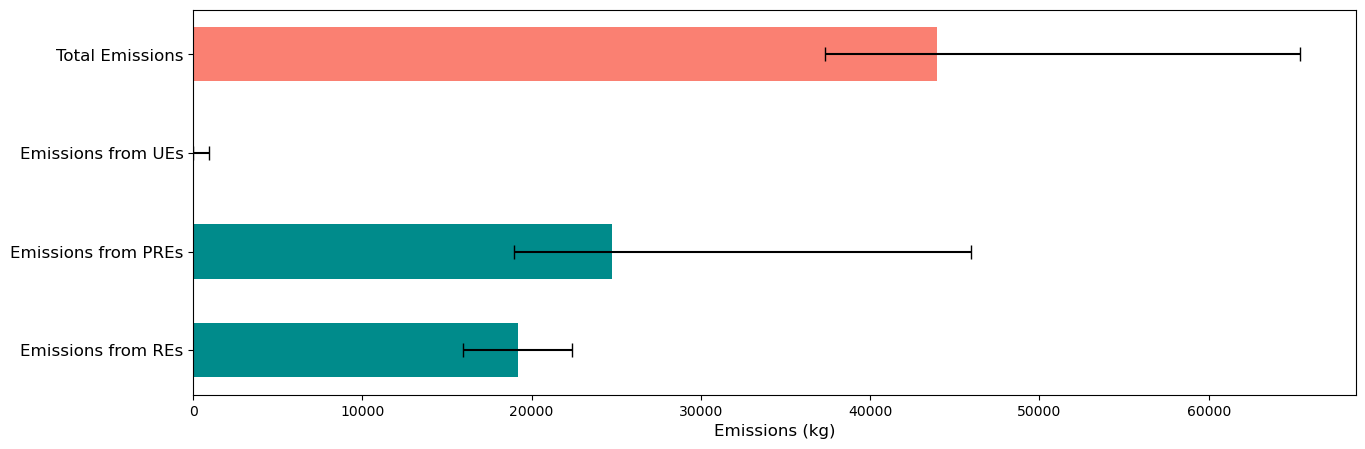

In [11]:
plt.figure(figsize=(15, 5))
categories = ['Emissions from REs', 'Emissions from PREs', 
              'Emissions from UEs', "Total Emissions"]
values = [19167.558683741994, 24719.308952058494, 35.22616276838076, 43922.09379856887]
errors = [[3208.3029715833563, 5751.638162570458, 32.416275587997944, 6586.015512093064],
          [3208.3029715833563, 21225.889099895125, 920.9016131660466, 21486.731622553696]]
bar_width = 0.55
colors = ['darkcyan', 'darkcyan', 'darkcyan', 'salmon']
index = np.arange(len(categories))
plt.barh(index, values, xerr=errors, height=bar_width, color=colors , capsize=5)
#plt.ylabel('Categories')
plt.xlabel('Emissions (kg)', fontsize=12)
plt.yticks(index, categories, fontsize=12)
plt.savefig("reconciled_results_case_study_1.png",dpi=600)